# Efficient Code

In [ ]:
# Rewrite the for loop to use enumerate
indexed_names = []
for i, name in enumerate(names):
    index_name = (i,name)
    indexed_names.append(index_name) 
print(indexed_names)

# Rewrite the above for loop using list comprehension
indexed_names_comp = [(i, name) for i,name in enumerate(names)]
print(indexed_names_comp)

# Unpack an enumerate object with a starting index of one
indexed_names_unpack = list(enumerate(names, start=1))
print(indexed_names_unpack)

## Built-in practice: map()

In [ ]:
# Use map to apply str.upper to each element in names
names_map  = map(str.upper, names)

# Print the type of the names_map
print(type(names_map))

# Unpack names_map into a list
names_uppercase = list(names_map)

# Print the list created above
print(names_uppercase)

## Practice with NumPy arrays

In [ ]:
# Print second row of nums
print(nums[1, :])

# Print all elements of nums that are greater than six
print(nums[nums > 6])

# Double every element of nums
nums_dbl = nums * 2
print(nums_dbl)

# Replace the third column of nums
nums[:,2] = nums[:,2] + 1
print(nums)

In [ ]:
# Create a list of arrival times
arrival_times = [*range(10,60,10)]

# Convert arrival_times to an array and update the times
arrival_times_np = np.array(arrival_times)
new_times = arrival_times_np - 3

# Use list comprehension and enumerate to pair guests to new times
guest_arrivals = [(names[i],time) for i,time in enumerate(new_times)]

# Map the welcome_guest function to each (guest,time) pair
welcome_map = map(welcome_guest, guest_arrivals)

guest_welcomes = [*welcome_map]
print(*guest_welcomes, sep='\n')

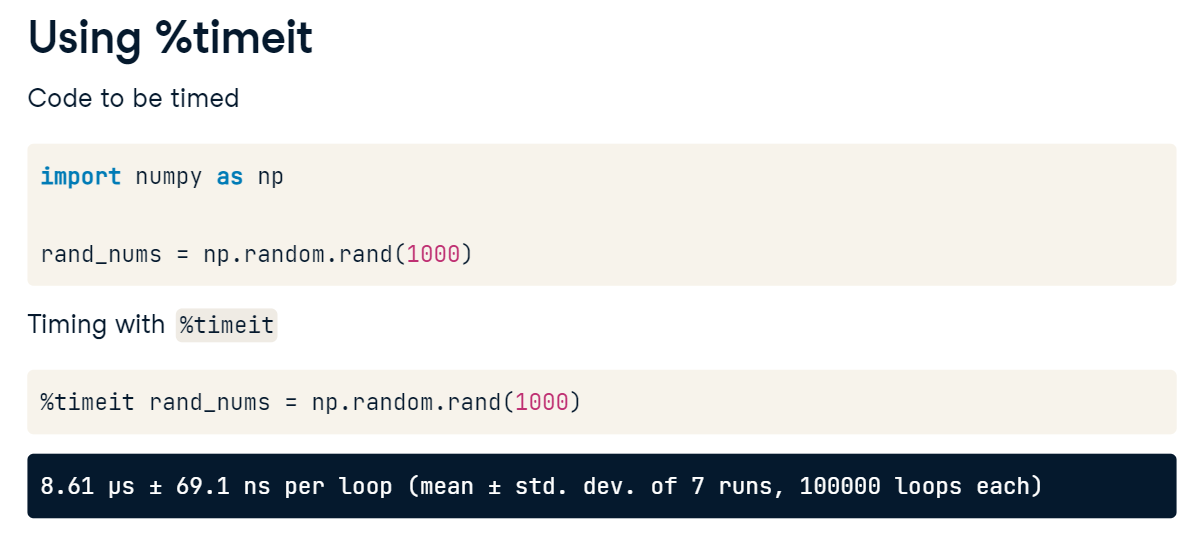
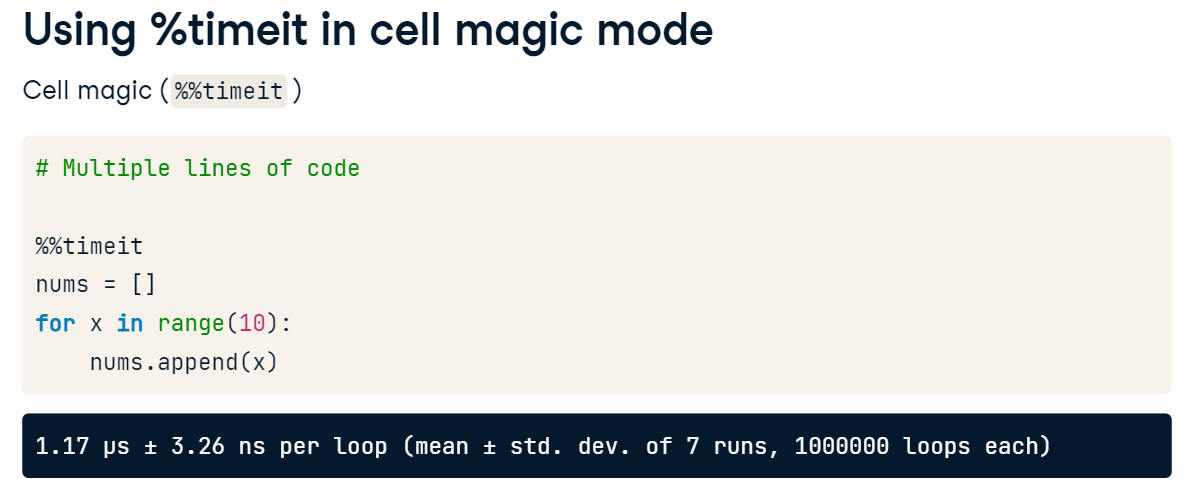

## Using Combination

In [ ]:
# Import combinations from itertools
from itertools import combinations 

# Create a combination object with pairs of Pokémon
combos_obj = combinations(pokemon, 2)
print(type(combos_obj), '\n')

# Convert combos_obj to a list by unpacking
combos_2 = [*list(combos_obj)]
print(combos_2, '\n')

# Collect all possible combinations of 4 Pokémon directly into a list
combos_4 = [*combinations(pokemon, 4)]
print(combos_4)

## Set

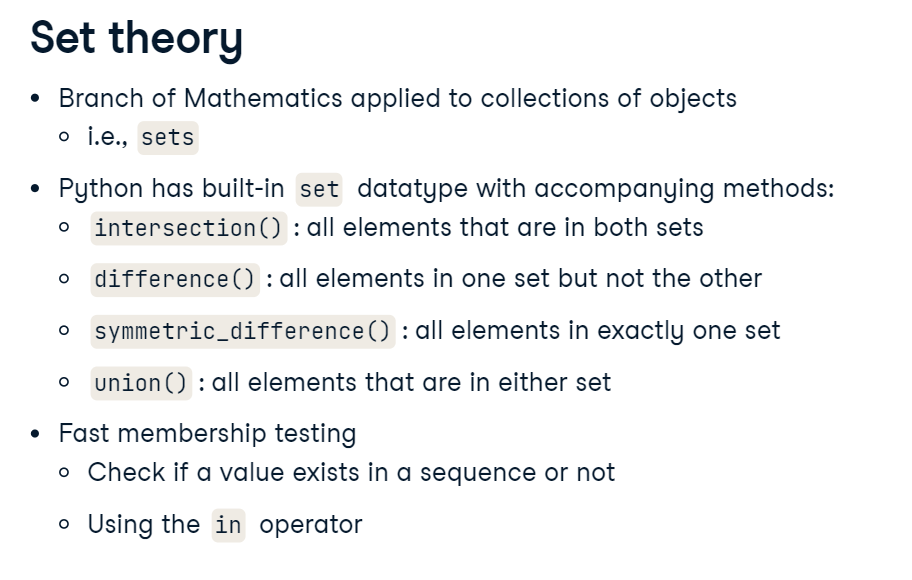

In [ ]:
# Convert both lists to sets
ash_set = set(ash_pokedex)
misty_set = set(misty_pokedex)

# Find the Pokémon that exist in both sets
both = ash_set.intersection(misty_set)
print(both)

# Find the Pokémon that Ash has and Misty does not have
ash_only = ash_set.difference(misty_set)
print(ash_only)

# Find the Pokémon that are in only one set (not both)
unique_to_set = ash_set.symmetric_difference(misty_set)
print(unique_to_set)

## Loops

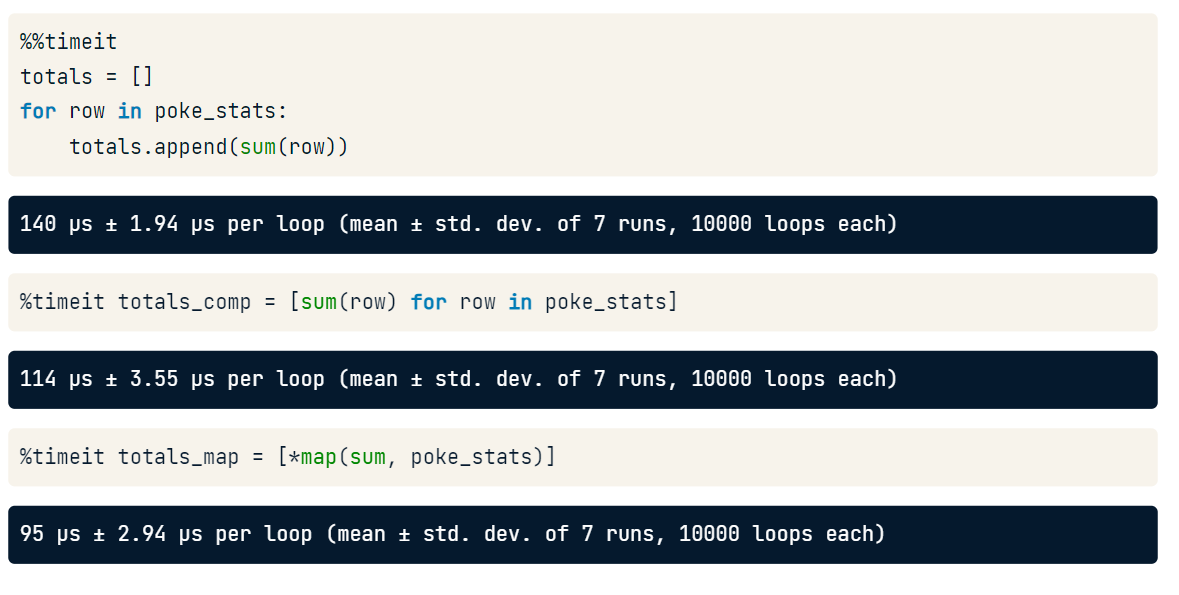

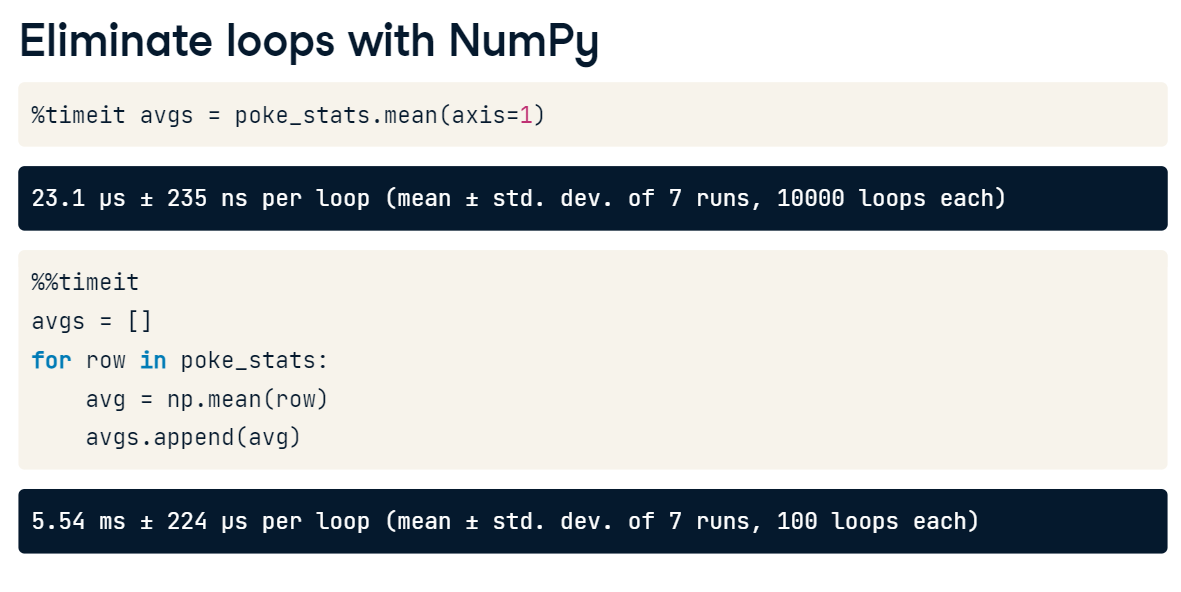

In [ ]:
# Create a total stats array
total_stats_np = stats.sum(axis=1)

# Create an average stats array
avg_stats_np = stats.mean(axis=1)

# Combine names, total_stats_np, and avg_stats_np into a list
poke_list_np = [*zip(names, total_stats_np, avg_stats_np)]

print(poke_list_np == poke_list, '\n')
print(poke_list_np[:3])
print(poke_list[:3], '\n')
top_3 = sorted(poke_list_np, key=lambda x: x[1], reverse=True)[:3]
print('3 strongest Pokémon:\n{}'.format(top_3))

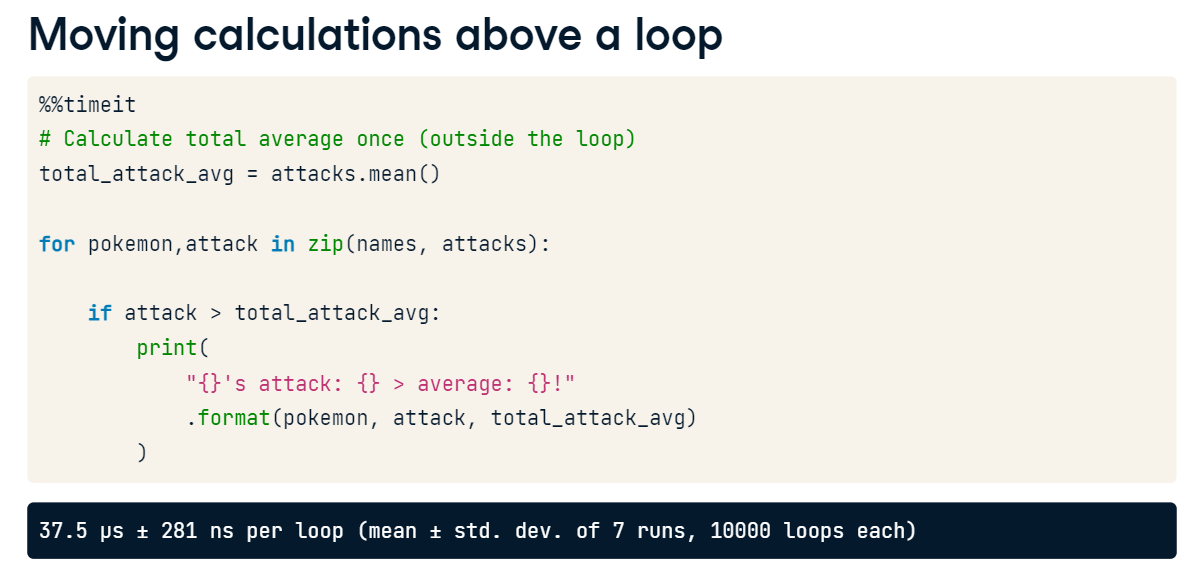

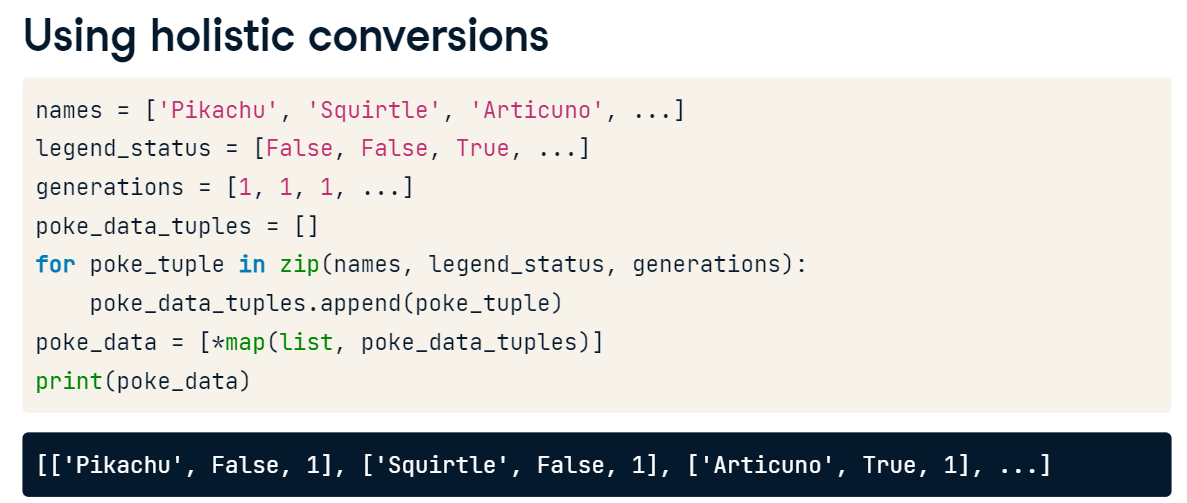

In [ ]:
# Calculate the total HP avg and total HP standard deviation
hp_avg = hps.mean()
hp_std = hps.std()

# Use NumPy to eliminate the previous for loop
z_scores = (hps - hp_avg)/hp_std

# Combine names, hps, and z_scores
poke_zscores2 = [*zip(names, hps, z_scores)]
print(*poke_zscores2[:3], sep='\n')

# Use list comprehension with the same logic as the highest_hp_pokemon code block
highest_hp_pokemon2 = [(names, hps, z_scores) for names, hps, z_scores in poke_zscores2 if z_scores > 2]
print(*highest_hp_pokemon2, sep='\n')

# **Pandas**

## Iterating with .iterrows()

In [ ]:
# Use one variable instead of two to store the result of .iterrows()
for row_tuple in pit_df.iterrows():
    print(row_tuple)

## Run differentials with .iterrows()

In [ ]:
# Create an empty list to store run differentials
run_diffs = []

# Write a for loop and collect runs allowed and runs scored for each row
for i,row in giants_df.iterrows():
    runs_scored = row['RS']
    runs_allowed = row['RA']
    
    # Use the provided function to calculate run_diff for each row
    run_diff = calc_run_diff(runs_scored, runs_allowed)
    
    # Append each run differential to the output list
    run_diffs.append(run_diff)

giants_df['RD'] = run_diffs
print(giants_df)

## Iterating with .itertuples()

In [ ]:
# Loop over the DataFrame and print each row's Index, Year and Wins (W)
for row in rangers_df.itertuples():
  i = row.Index
  year = row.Year
  wins = row.W
  
  # Check if rangers made Playoffs (1 means yes; 0 means no)
  if row.Playoffs == 1:
    print(row.Index, row.Year, row.W)

## Run differentials with .itertuples()

In [ ]:
run_diffs = []

# Loop over the DataFrame and calculate each row's run differential
for row in yankees_df.itertuples():
    
    runs_scored = row.RS
    runs_allowed = row.RA

    run_diff = calc_run_diff(runs_scored, runs_allowed)
    
    run_diffs.append(run_diff)

# Append new column
yankees_df['RD'] = run_diffs
print(yankees_df)

## pandas alternative to looping
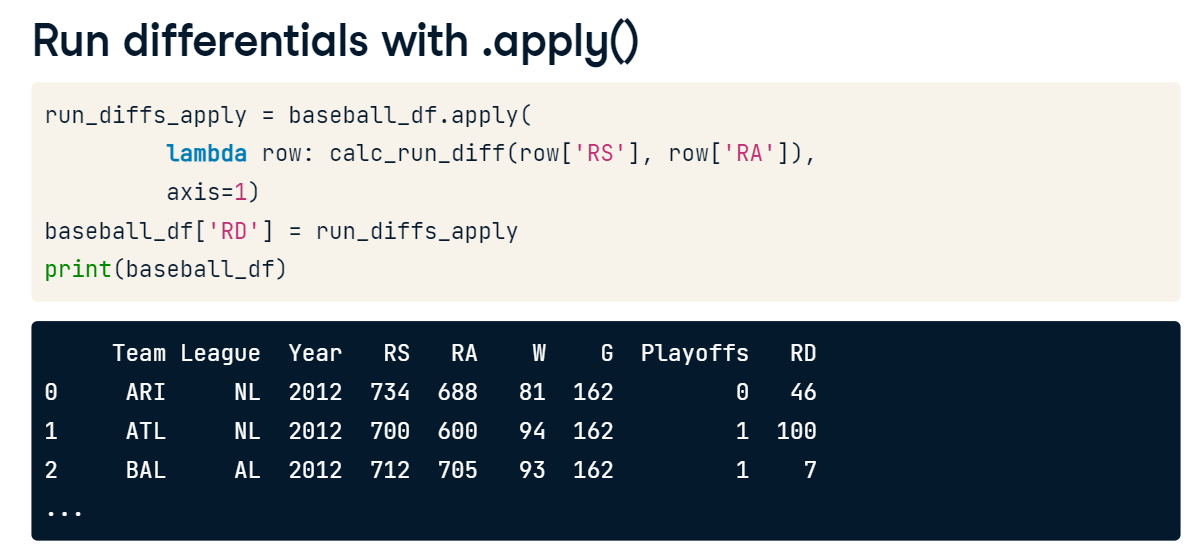

## Settle a debate with .apply()

In [ ]:
# Display the first five rows of the DataFrame
print(dbacks_df.head())

# Create a win percentage Series 
win_percs = dbacks_df.apply(lambda row: calc_win_perc(row['W'], row['G']), axis=1)
print(win_percs, '\n')

# Append a new column to dbacks_df
dbacks_df['WP'] = win_percs
print(dbacks_df, '\n')

# Display dbacks_df where WP is greater than 0.50
print(dbacks_df[dbacks_df['WP'] >= 0.50])

## Optimal pandas iterating
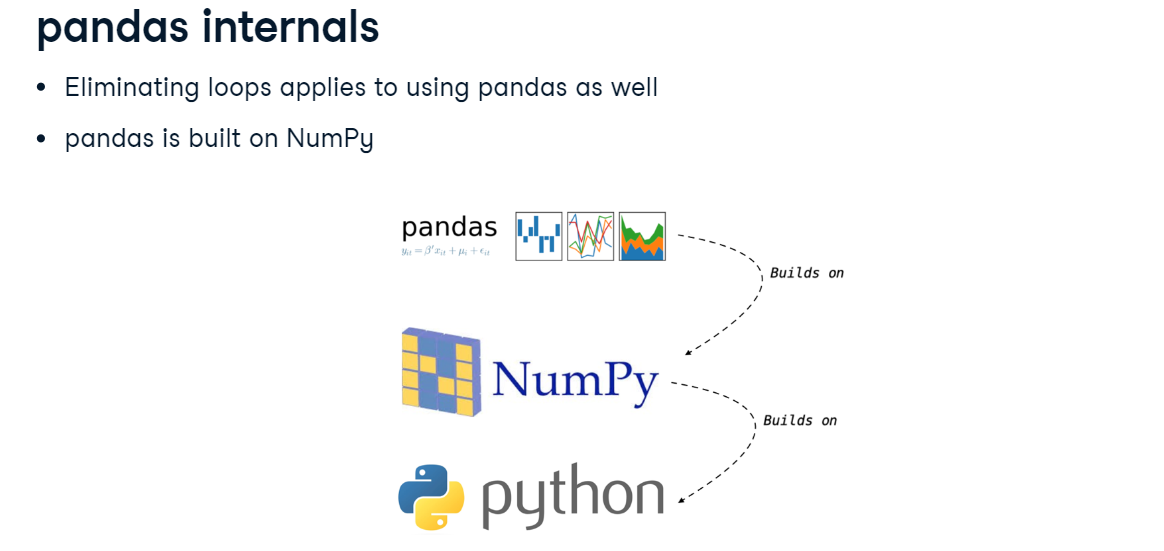


## Replacing .iloc with underlying arrays

In [ ]:
# Use the W array and G array to calculate win percentages
win_percs_np = calc_win_perc(baseball_df['W'].values, baseball_df['G'].values)

# Append a new column to baseball_df that stores all win percentages
baseball_df['WP'] = win_percs_np

print(baseball_df.head())

## Bringing it all together: Predict win percentage

In [ ]:
win_perc_preds_loop = []

# Use a loop and .itertuples() to collect each row's predicted win percentage
for row in baseball_df.itertuples():
    runs_scored = row.RS
    runs_allowed = row.RA
    win_perc_pred = predict_win_perc(runs_scored, runs_allowed)
    win_perc_preds_loop.append(win_perc_pred)

# Apply predict_win_perc to each row of the DataFrame
win_perc_preds_apply = baseball_df.apply(lambda row: predict_win_perc(row['RS'], row['RA']), axis=1)

# Calculate the win percentage predictions using NumPy arrays
win_perc_preds_np = predict_win_perc(baseball_df['RS'].array, baseball_df['RA'].array)
baseball_df['WP_preds'] = win_perc_preds_np
print(baseball_df.head())